<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/digit_image_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2
#  the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# Normalise to 0 to 1 range
x_train /= 255
x_test /= 255
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


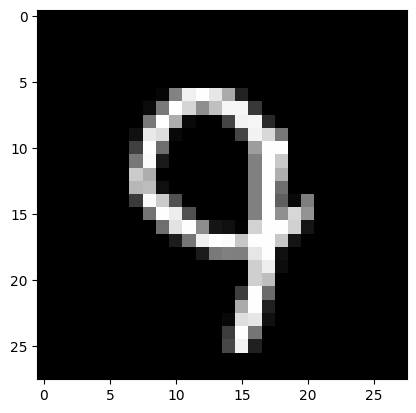

In [ ]:
print("Label:",y_test[999:1000])
plt.imshow(x_test[999:1000].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation="sigmoid", input_shape=(784,)))
model.add(Dense(32, activation="sigmoid", input_shape=(784,)))
model.add(Dense(32, activation="sigmoid", input_shape=(784,)))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape of First Layer (784, 32)
Visualisation of First Layer


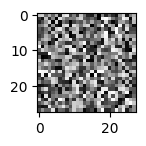

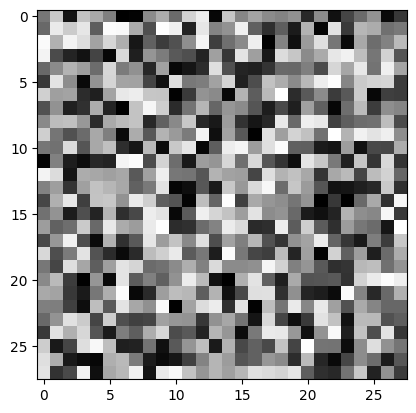

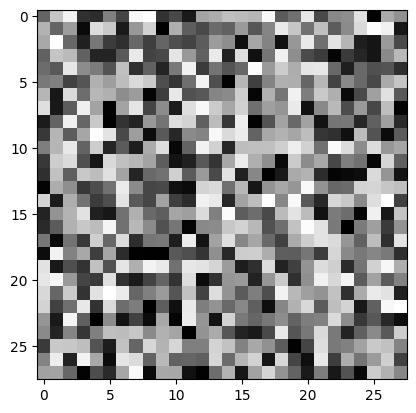

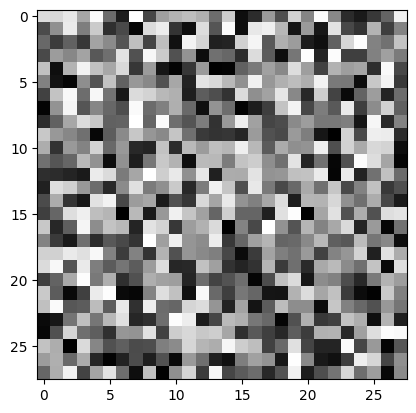

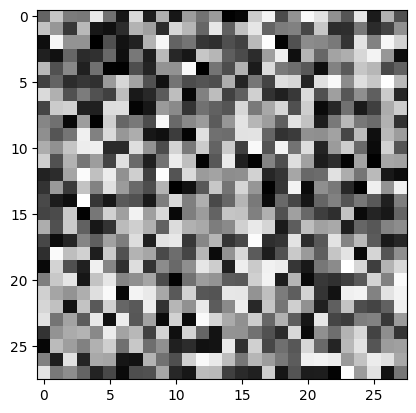

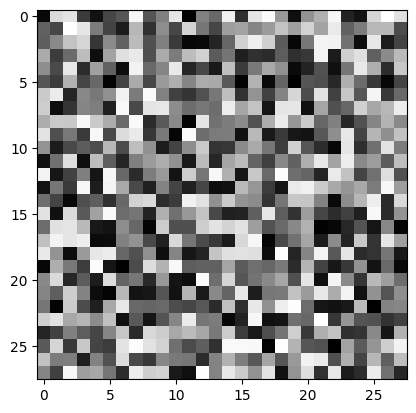

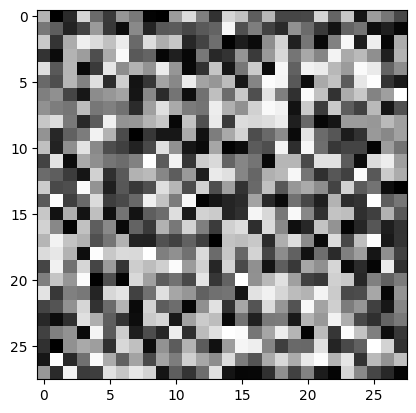

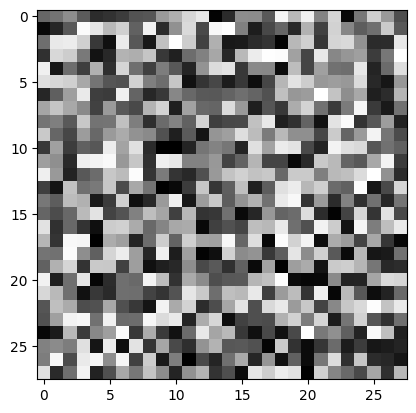

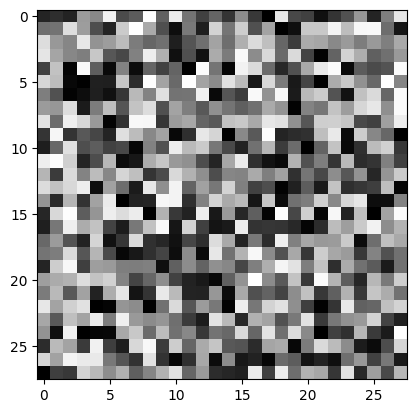

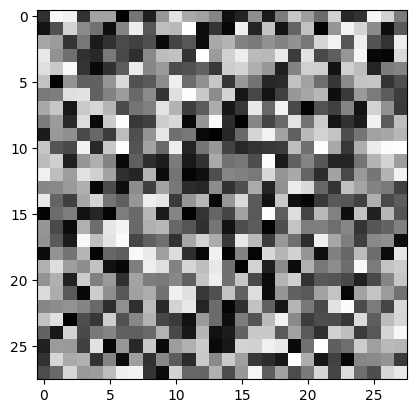

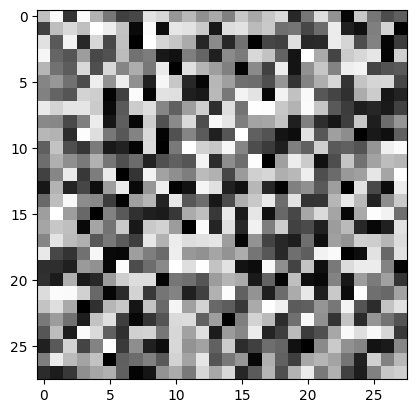

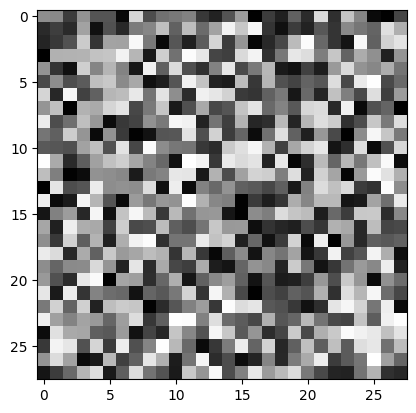

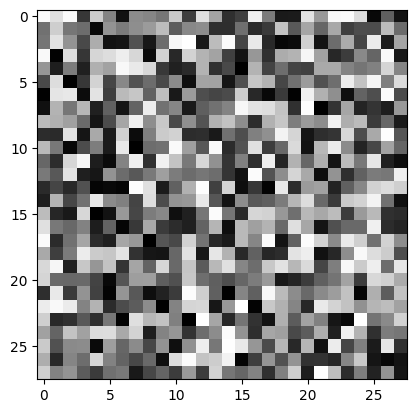

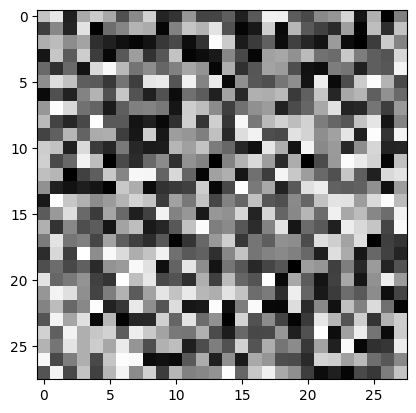

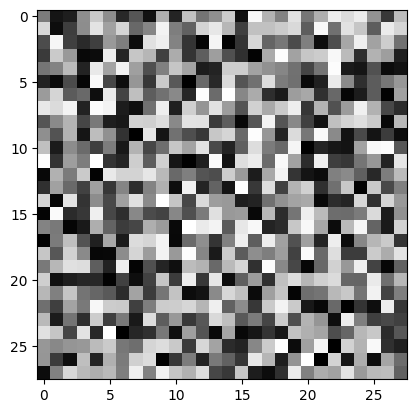

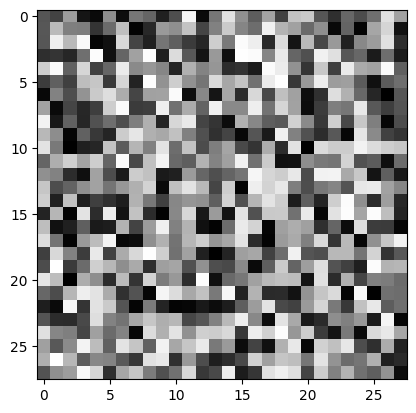

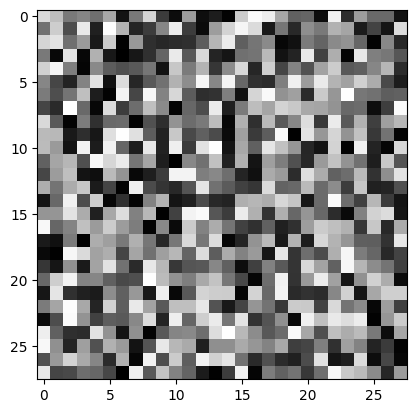

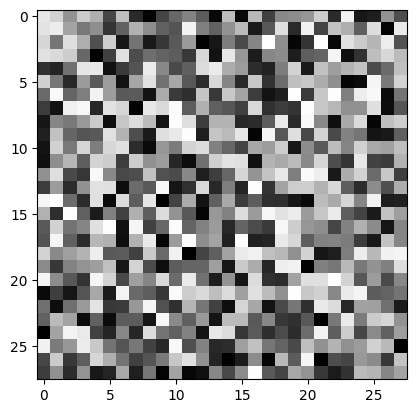

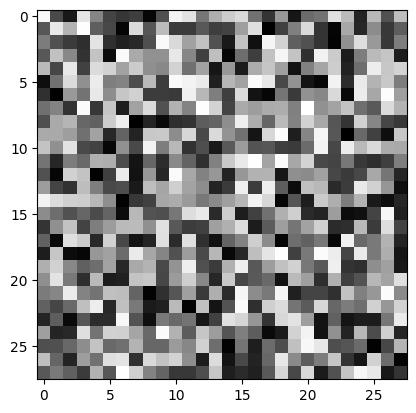

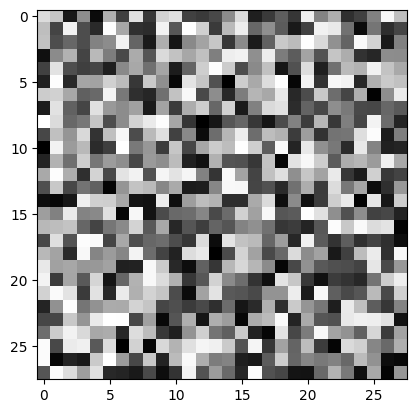

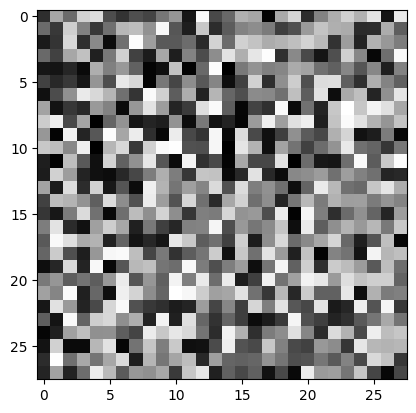

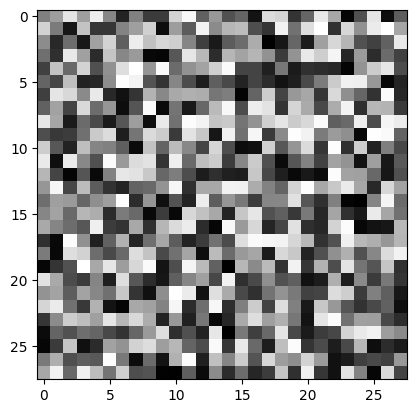

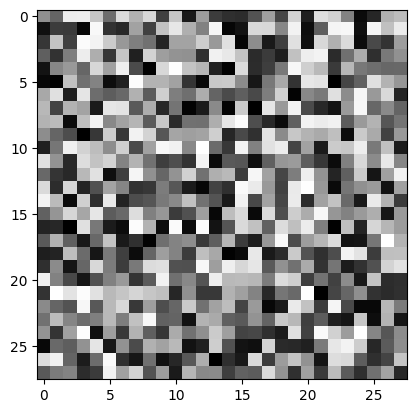

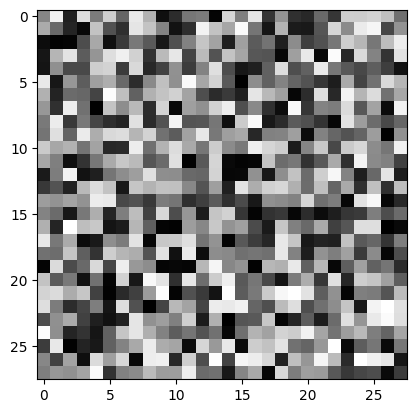

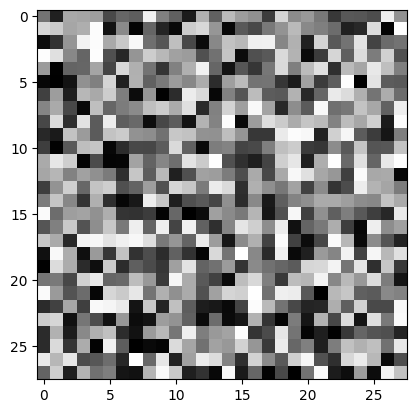

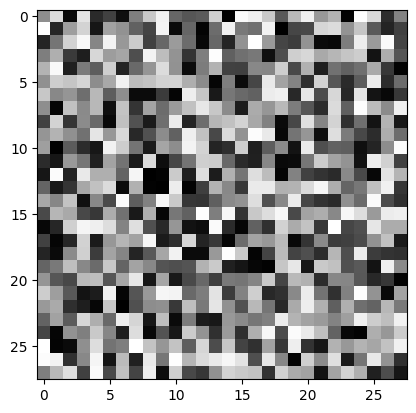

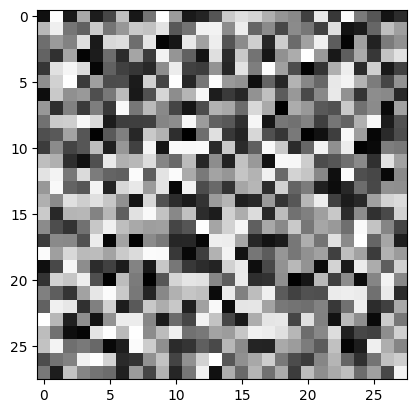

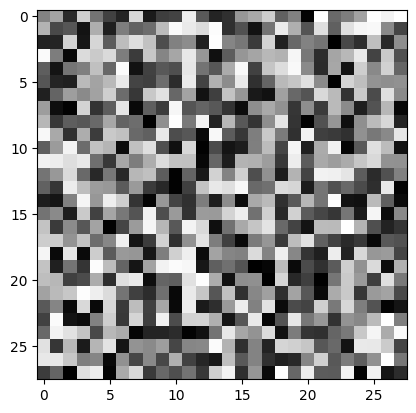

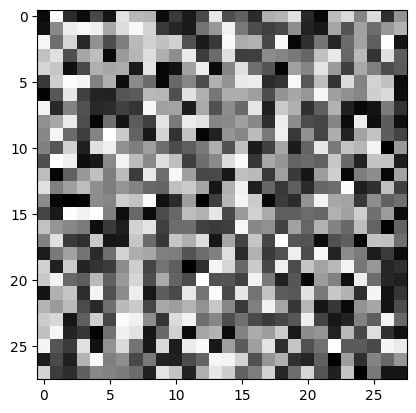

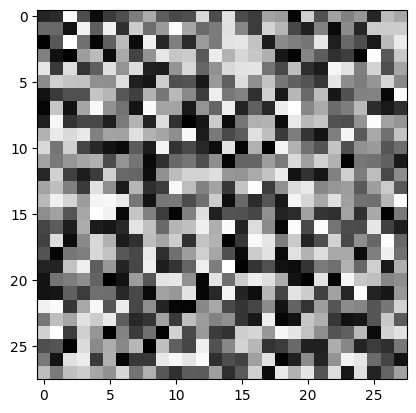

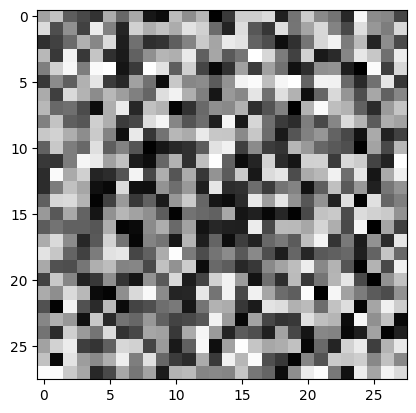

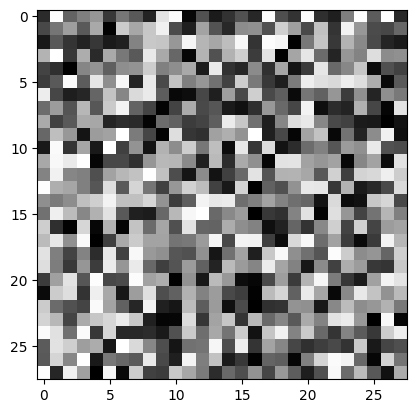

In [ ]:
w = []
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer", layer1.shape)
print("Visualisation of First Layer")
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
 fig.add_subplot(rows, columns, i)
 plt.imshow(layer1[:,i-1].reshape(28,28),cmap="gray")
 plt.show()


Shape of First Layer (784, 32)
Visualisation of First Layer


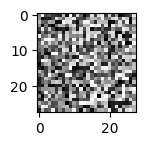

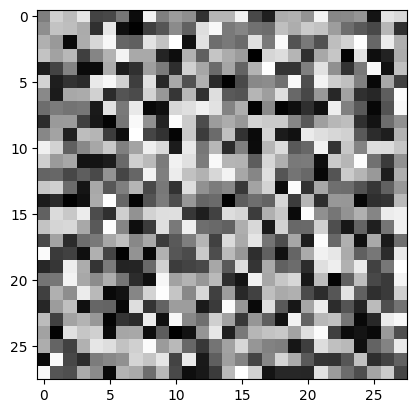

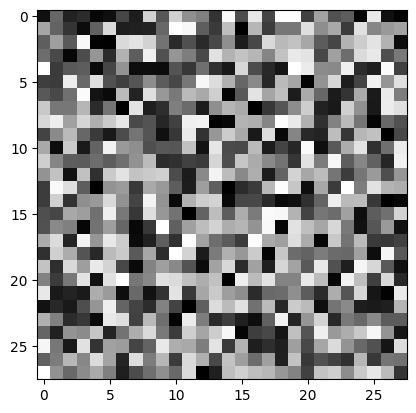

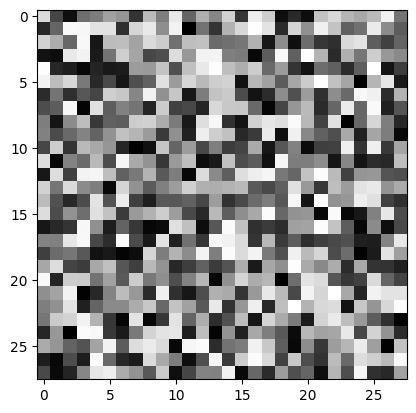

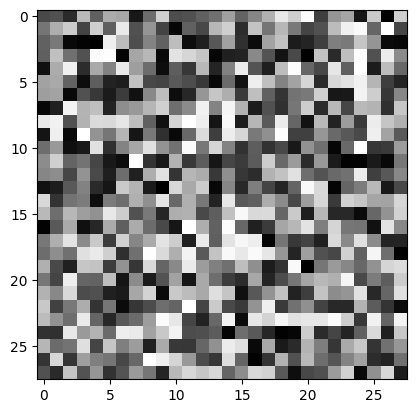

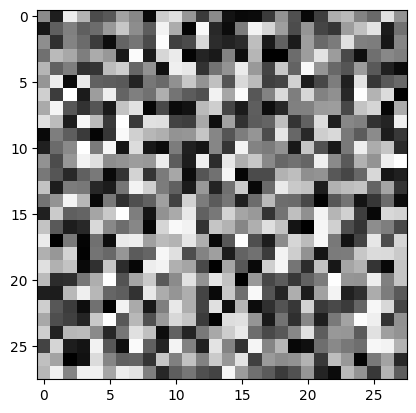

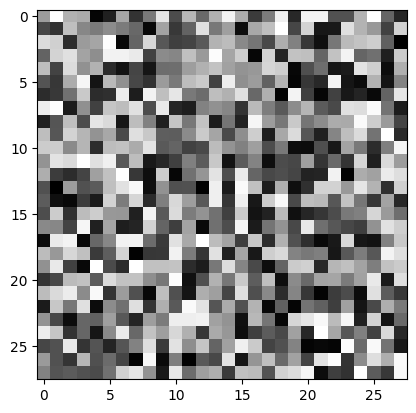

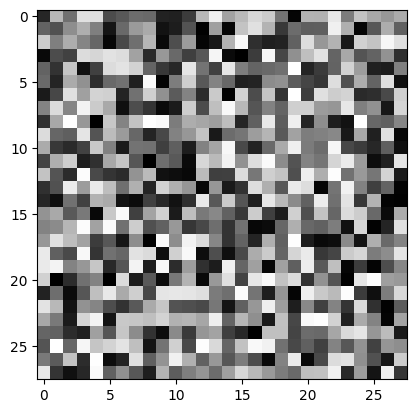

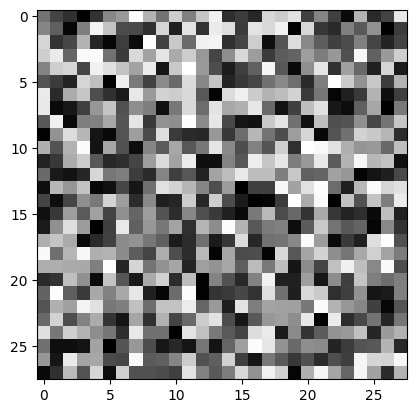

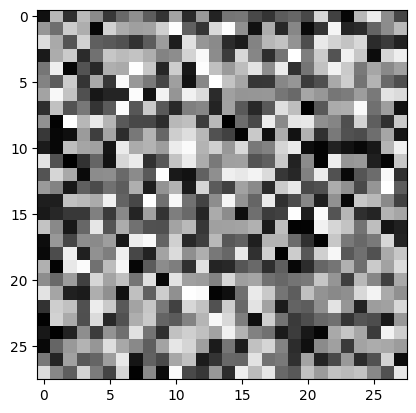

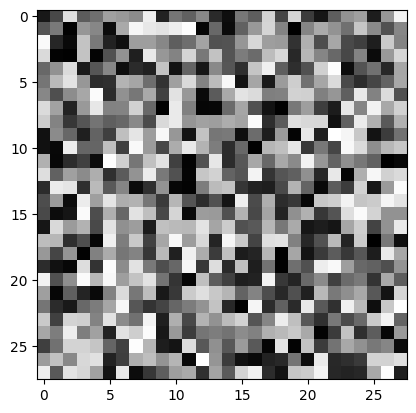

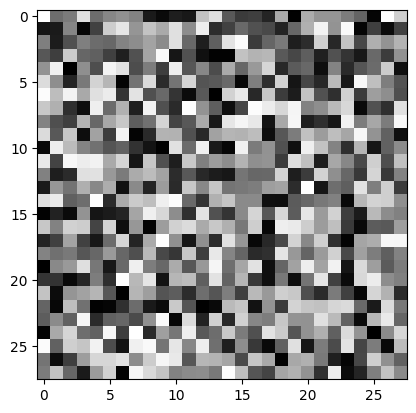

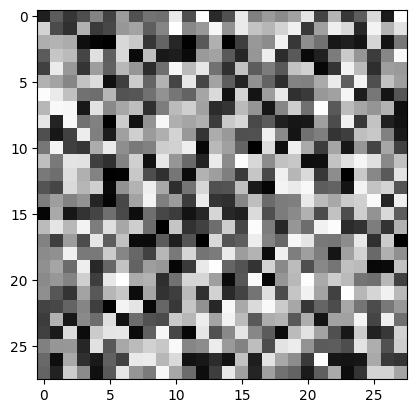

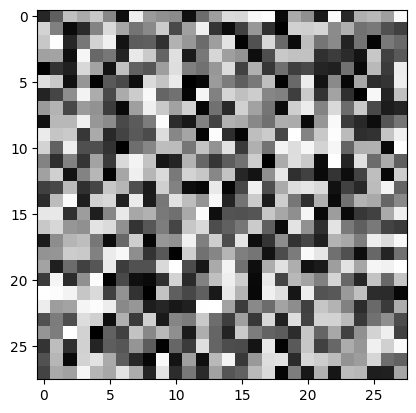

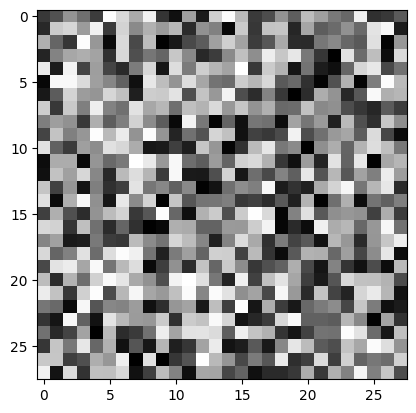

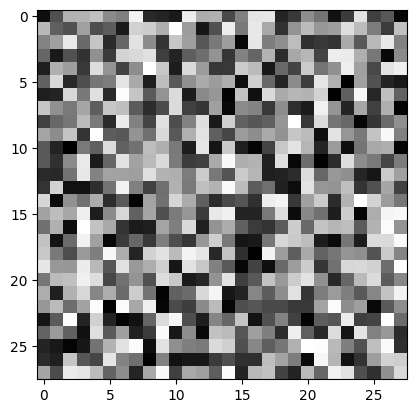

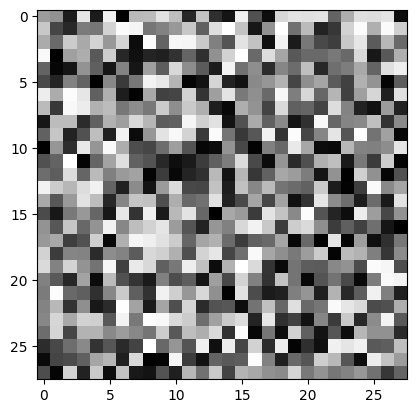

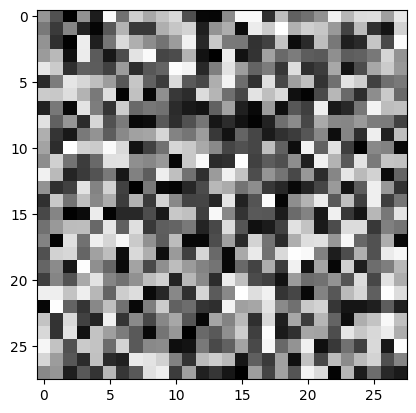

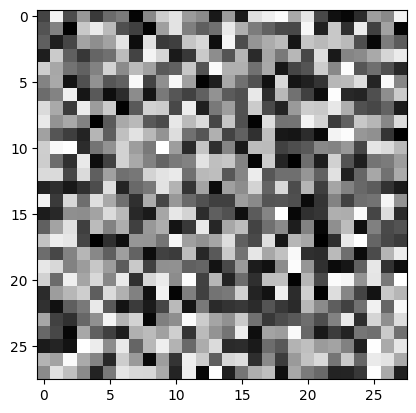

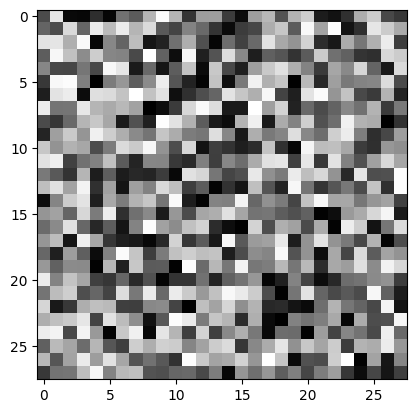

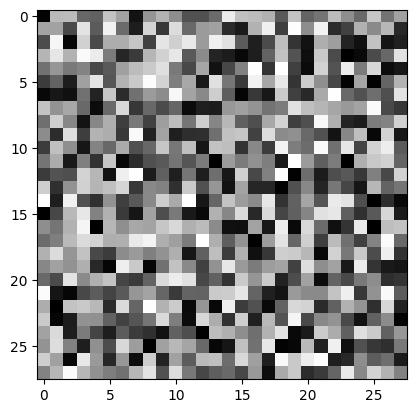

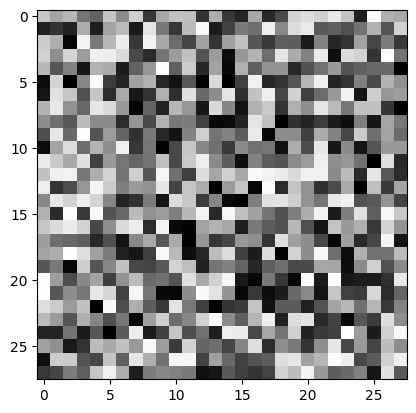

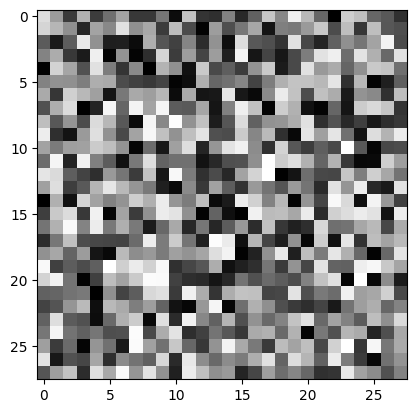

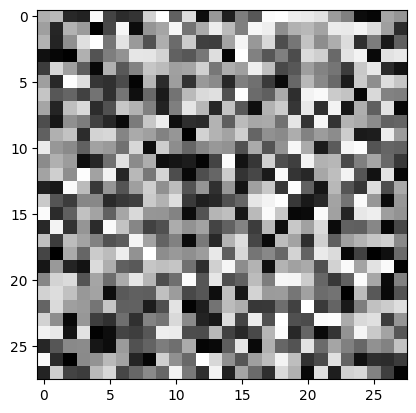

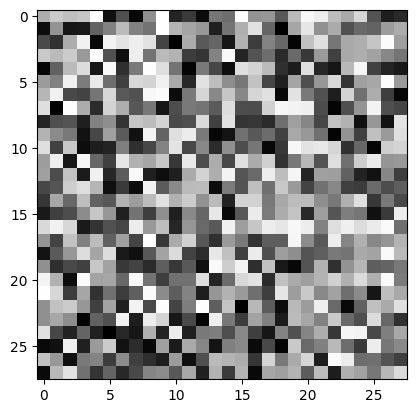

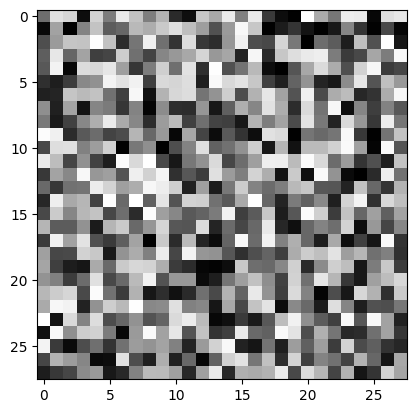

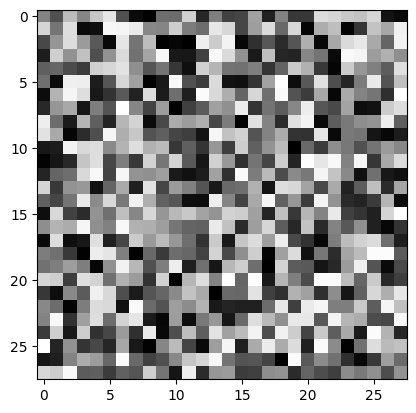

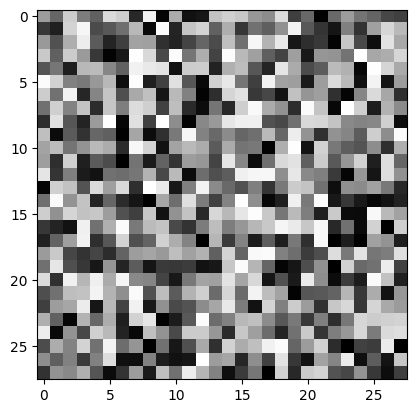

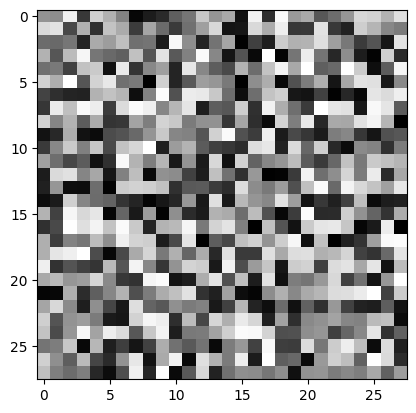

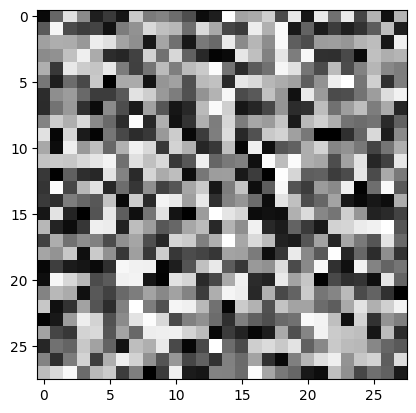

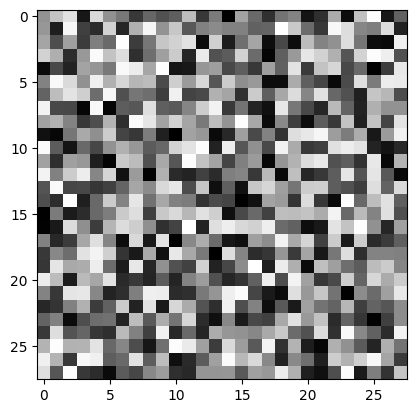

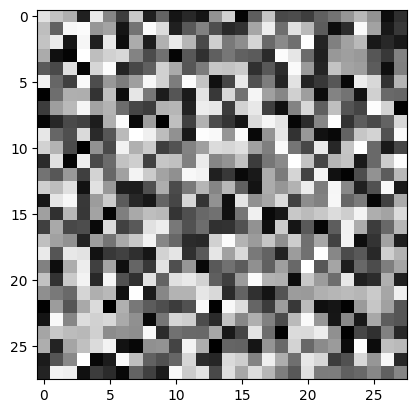

In [ ]:
w = []
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer", layer1.shape)
print("Visualisation of First Layer")
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
 fig.add_subplot(rows, columns, i)
 plt.imshow(layer1[:,i-1].reshape(28,28),cmap="gray")
 plt.show()

In [ ]:
model.compile(loss="categorical_crossenthropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Epoch 1/2


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'categorical_crossenthropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
prediction = model.predict(x_test[999:1000])
prediction = prediction[0]
print("Prediction\n", prediction)
print("\nThresholded output\n", (prediction>0.5)*1)


1/1 [==============================] - 0s 121ms/step
Prediction
 [0.11895494 0.07241113 0.07241104 0.19782531 0.08003508 0.11104193
 0.08714485 0.06331465 0.06310239 0.13375868]

Thresholded output
 [0 0 0 0 0 0 0 0 0 0]


In [ ]:
plt.imshow(x_test[999:1000].reshape(28,28), cmap="gray")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit.jpg to digit (1).jpg


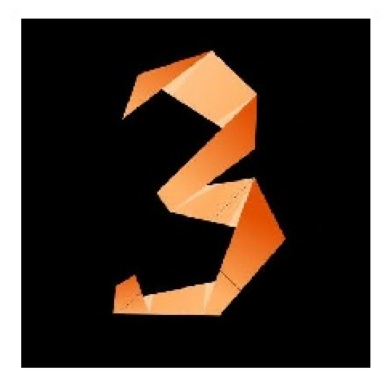

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))   #Convert BGR to RGB
plt.axis('off')
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1, 784))
print('Prediction Score:\n', prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score: \n', thresholded[0])
print('\nPredicted Digit:\n', np.where(thresholded==1)[1][0])

1/1 [==============================] - 0s 22ms/step
Prediction Score:
 [0.12037575 0.07205974 0.07351496 0.19466984 0.08000754 0.11294375
 0.09193908 0.06082324 0.06159079 0.13207535]

Thresholded Score: 
 [0 0 0 0 0 0 0 0 0 0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit.jpg to digit.jpg


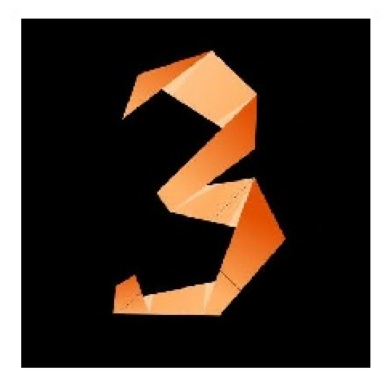

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))   #Convert BGR to RGB
plt.axis('off')
plt.show()

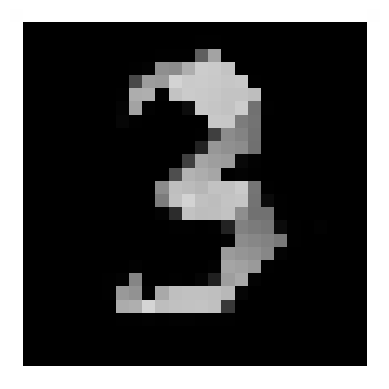

In [ ]:
image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28,28))
#Show image
plt.imshow(image_resized, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1, 784))
print('Prediction Score:\n', prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score: \n', thresholded[0])
print('\nPredicted Digit: \n', np.where(thresholded==1)[1][0])


1/1 [==============================] - 0s 33ms/step
Prediction Score:
 [0.12037575 0.07205974 0.07351496 0.19466984 0.08000754 0.11294375
 0.09193908 0.06082324 0.06159079 0.13207535]

Thresholded Score: 
 [0 0 0 0 0 0 0 0 0 0]


IndexError: index 0 is out of bounds for axis 0 with size 0